In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from numpy.polynomial.polynomial import polyfit
import cartopy.crs as ccrs
import community
from nltk.corpus import stopwords
from nltk import word_tokenize
import string
import math
from wordcloud import WordCloud
import pandas as pd
from tqdm import tqdm_notebook as tqdm
import urllib
from bs4 import BeautifulSoup
import re
%matplotlib inline

In [2]:
# load the airport graph
G = nx.read_gpickle("pickle graphs/subgraph")
G = G.to_undirected()

print("{} nodes".format(G.number_of_nodes()))
print("{} edges".format(G.number_of_edges()))

3972 nodes
28608 edges


In [3]:
euro_map = [-34, 55, 25, 70]
na_map = [-170, -50, 10, 80]
sa_map = [-90, -30, -55, 15]
af_map = [-20, 55, -35, 35]
oc_map = [90, 180, -40, 15]
as_map = [25, 180, -3, 70]

def graph_plot(G, zoom):
    
    pos = {}

    # get airport's position, country and continent
    for iata in G.nodes:
        pos[iata] = (float(G.node[iata]['longitude']), float(G.node[iata]['latitude']))
    
    sizes = [0 for iata in G.nodes]
    
    # set iata code as node label for nodes whose degree is above the given percentile
    if zoom == euro_map:
        labels = {iata: iata if G.node[iata]['continent'] != 'Europe' else '' for iata in G.nodes}
    elif zoom == na_map:
        labels = {iata: iata if G.node[iata]['continent'] != 'North America' else '' for iata in G.nodes}
    elif zoom == sa_map:
        labels = {iata: iata if G.node[iata]['continent'] != 'South America' else '' for iata in G.nodes}
    elif zoom == af_map:
        labels = {iata: iata if G.node[iata]['continent'] != 'Africa' else '' for iata in G.nodes}
    elif zoom == oc_map:
        labels = {iata: iata if G.node[iata]['continent'] != 'Oceania' else '' for iata in G.nodes}
    elif zoom == as_map:
        labels = {iata: iata if G.node[iata]['continent'] != 'Asia' else '' for iata in G.nodes}
    else:
        labels = {iata: '' for iata in G.nodes}
        
    fig, ax = plt.subplots(1, 1, figsize=(18, 18), subplot_kw=dict(projection=ccrs.PlateCarree()))
    ax.coastlines()
    ax.set_extent(zoom)    # zoom in on the map
    plt.rcParams["font.weight"] = "bold"
    
    nx.draw_networkx(G, ax=ax,
                     font_size=25,
                     width=0,
                     node_size=sizes,
                     labels=labels,
                     fontweight="bold",
                     pos=pos)

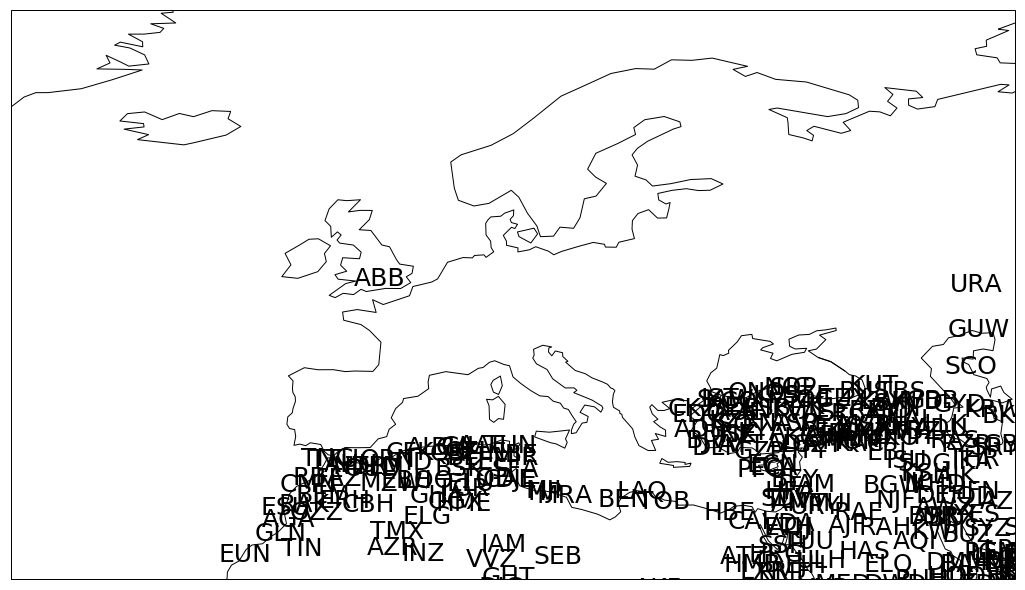

In [6]:
graph_plot(G, zoom=euro_map)

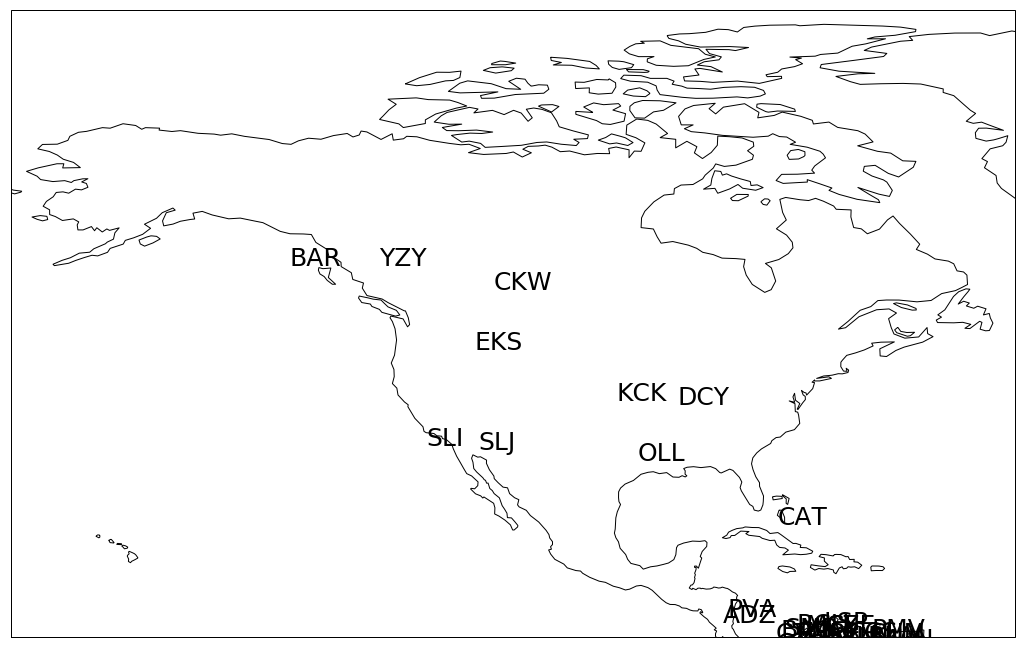

In [7]:
graph_plot(G, zoom=na_map)

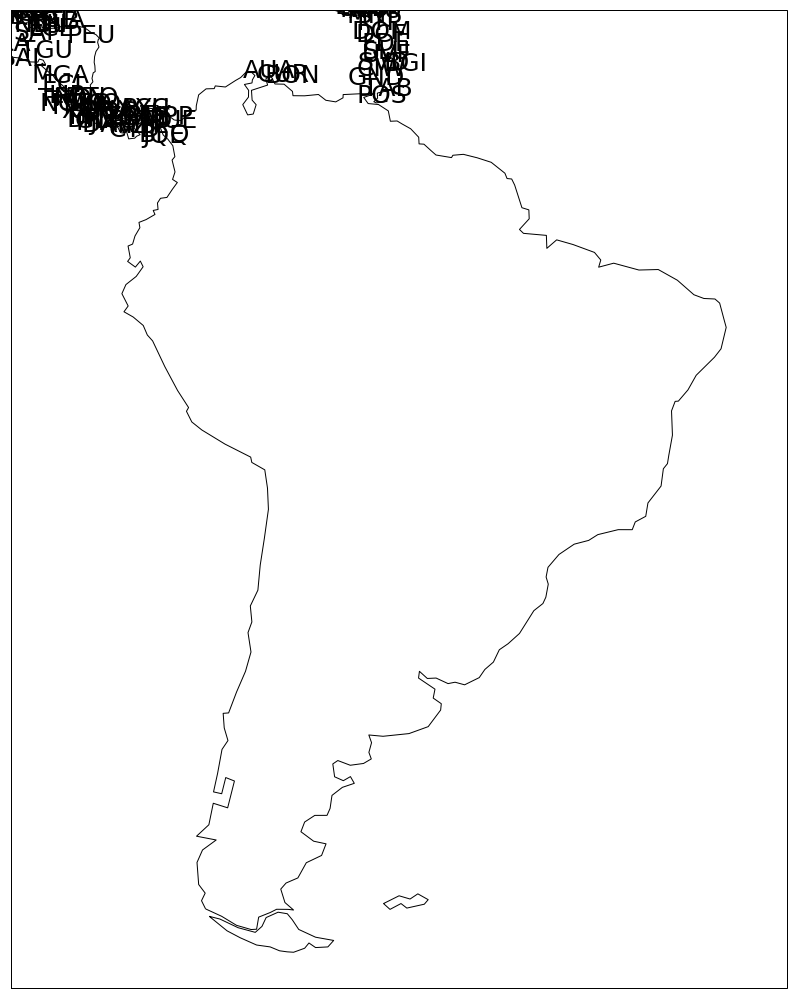

In [8]:
graph_plot(G, zoom=sa_map)

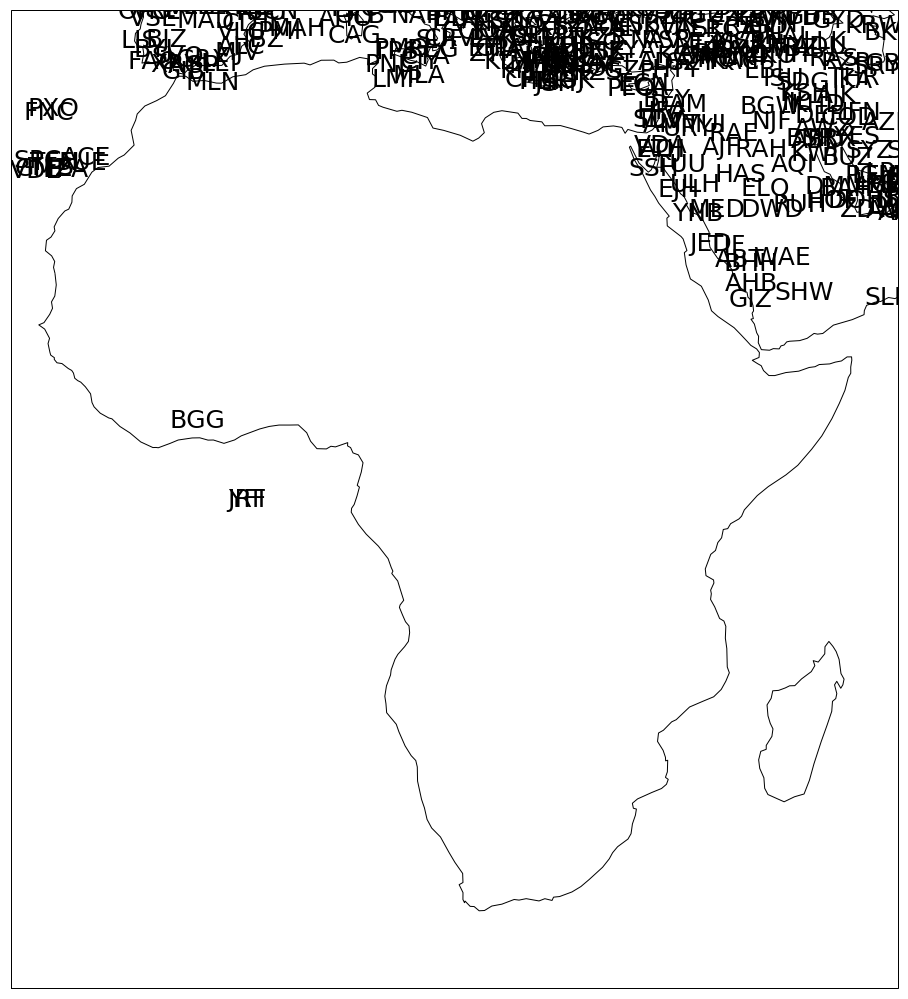

In [9]:
graph_plot(G, zoom=euro_map)

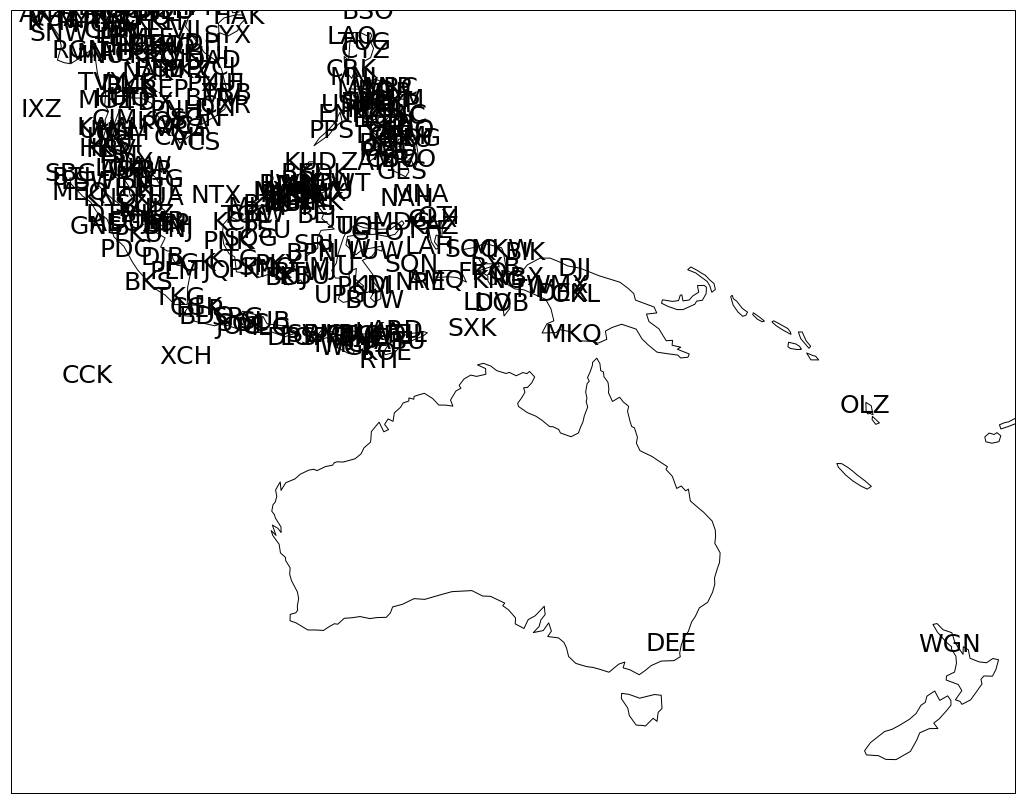

In [10]:
graph_plot(G, zoom=oc_map)

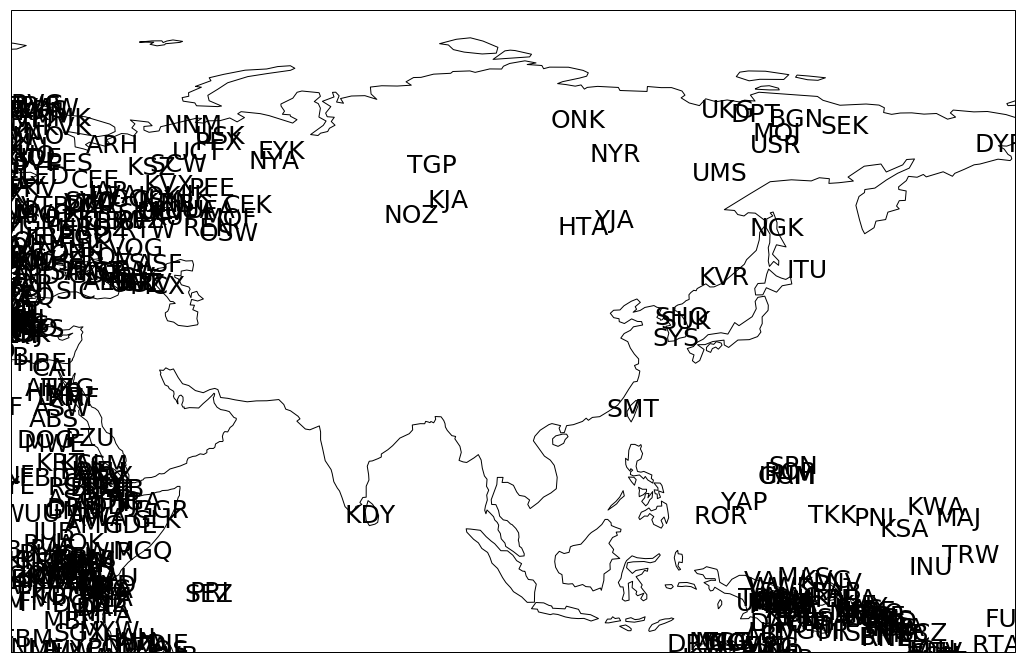

In [11]:
graph_plot(G, zoom=as_map)

In [ ]:
errors = ['YZY', 'BAR']

In [77]:
for node in G.nodes(data=True):
    if node[0] == 'YZY':
        print(node[1]['longitude'], node[1]['latitude'])

-123.13200378399999 55.304401397700005


In [ ]:
graph_plot(G, zoom=euro_map)

C:\Users\sande\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


In [ ]:
graph_plot(G, zoom=sa_map)

In [ ]:
graph_plot(G, zoom=as_map)

In [ ]:
graph_plot(G, zoom=af_map)

In [ ]:
graph_plot(G, zoom=oc_map)